# Literate programming using IPython notebooks

[Literate programming](http://en.wikipedia.org/wiki/Literate_programming) is a concept promoted by Donald Knuth, the famous computer scientist (and the author of the *Art of Computer Programming*.) According to this concept, computer programs should be written in a combination of the programming language (the usual source code) and the natural language, which explains the logic of the program. 

![Donald Knuth](http://www-cs-faculty.stanford.edu/~uno/don.gif "Donald E. Knuth")


When it comes to scientific programming, using comments for natural-language explanations is not always convenient. Moreover, it is limited, because such explanations may require figures, equations, and other common elements of scientific texts. IPython/Jupyter notebooks provide a convenient tool for combining different text elements with code. In this notebook, I show how to use them effective with SConstruct data-analysis workflows in [Madagascar](http://www.ahay.org). 

## Madagascar interface

The only element that we will need from the Python interface to Madagascar is the **view** function.

In [1]:
from m8r import view

## File magic

Instead of writing SConstruct as one file, we are going to break this file into different parts and include them in the IPython notebook using **%%file** magic. Each part will be a file with .scons suffix. 

In the first part, we are downloading input data (a short gather) and converting it to [RSF format](http://www.ahay.org/wiki/Guide_to_RSF_file_format).

In [6]:
%%file data.scons

# Download data 
#Fetch('wz.25.H','wz')

# Convert and window
Flow('data','/Users/sergey/geo/fomels/cise/tpow/wz.25.H',
     '''
     dd form=native | window min2=-2 max2=2 | 
     put label1=Time label2=Offset unit1=s unit2=km
     ''')

Overwriting data.scons


The shot gather comes from the collection of shot gathers by Yilmaz and Cumro.

The pipeline in the second **Flow** converts the data to the native format, windows the offsets to the range from -2 to +2 km, and adds apppropriate labels and units. Next, let us display the data with and without the time-power correction.

In [8]:
%%file display.scons

# two plots displayed side by side
Plot('data','grey title="(a) Original Data"')
Plot('tpow2','data',
     'pow pow1=3 | grey title="(b) Time Power Correction" ')

Result('tpow','data tpow2','SideBySideAniso')

Overwriting display.scons


The time-power correction is simply a multiplication of the data $d(t,x)$ by time $t$ to some power $\alpha$: 

$$d_{\alpha}(t,x) = d(t,x)\,t^{\alpha}.$$

In the example above, $\alpha=2$. Try changing the value of the time power and observe the results.

Now that we defined our **Result** plot, we can display it using **view()**.

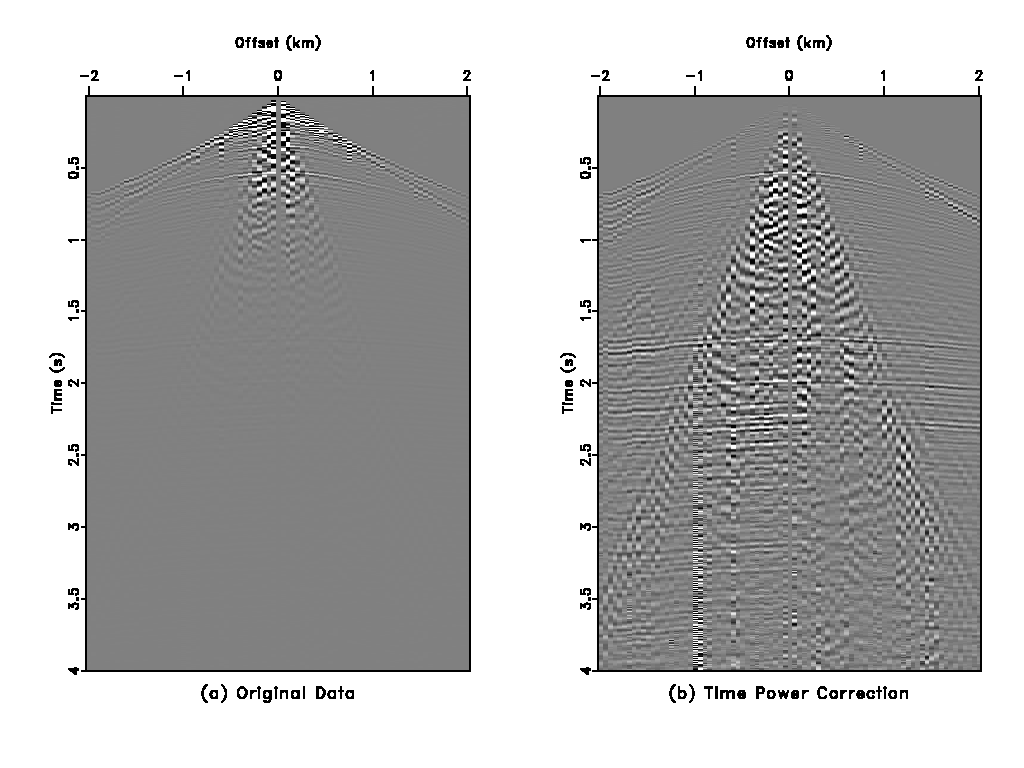

In [9]:
view('tpow')

## How does it work?

The function **view()** is specified in [m8r.py](https://sourceforge.net/p/rsf/code/14359/tree/trunk/api/python/m8r.py) as follows:
```python
def view(name):
    try:
        from IPython.display import Image
        png = name+'.png'
        makefile = os.path.join(rsf.prog.RSFROOT,'include','Makefile')
        os.system('make -f %s %s' % (makefile,png))
        return Image(filename=png)
    except:
        print 'No IPython Image support'
        return None
```
It runs the **make** command to generate the image and imports it into IPython. The corresponding **Makefile** is 
```
SConstruct: *.scons
	echo "from rsf.proj import *" > $@
	cat $^ >> $@
	echo "\nEnd()" >> $@

%.png: SConstruct
	scons Fig/$*.vpl
	vpconvert pen=gd fat=3 serifs=n bgcolor=w Fig/$*.vpl $@
```
It collects all \*.scons files into one SConstruct file, uses **scons** to create the result figure, and converts the figure to the PNG format using **vpconvert**. 

## Cleaning up

In [1]:
!scons -cQ

Removed wz.25.H
Removed RSFROOT/data/Users/sergey/wz.25.H
Removed data.rsf
Removed RSFROOT/data/Users/sergey/data.rsf@
Removed data.vpl
Removed tpow2.vpl
Removed Fig/tpow.vpl


In [2]:
!rm *.png

## Conclusions

This example notebook illustrate how you might combine Python/SConstruct commands with human-language explanations (including equations, links, figures, etc.) in the spirit of "literate programming". Feel free to experiment!

To convert a notebook to other formats, use <tt>ipython nbconvert</tt>.